#1. Load Libraries

In [ ]:
!pip install scattertext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.3 MB 583 kB/s 
     |████████████████████████████████| 24.1 MB 1.7 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=031594027e7856c7502127bc3c0a1879104dc2b0164d11b20b6a0bae508dc9b0
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import pandas as pd
from sklearn import feature_extraction, model_selection, pipeline, manifold, preprocessing,feature_selection
import scattertext as st
import spacy
import plotly.express as px
from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Dataset 

##2.1 Recipes Main Dataset

###The Recipe datset is collected from RecipeBox. https://eightportions.com/datasets/Recipes/#fn:1  
###It contains 125,000 recipes from various food websites.

### A first dataset to train the Doc2Vec model with the set of ingredients per recipe and a second dataset to train a model to predict the type of cuisine from a set of ingredients.

In [ ]:
df_ar = pd.read_json('/content/drive/MyDrive/my_data/recipes_raw/recipes_raw_nosource_ar.json',orient='index')
# df_ar = pd.read_json('recipes_raw/recipes_raw_nosource_ar.json',orient='index')

In [ ]:
df_ar.head()

,title,ingredients,instructions,picture_link
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe
clyYQv.CplpwJtjNaFGhx0VilNYqRxu,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56
BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi
N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm


In [ ]:
df_ar.shape # The dataset contains 4 rows and 39802 columns.

(39522, 4)

In [ ]:
df_epi = pd.read_json('/content/drive/MyDrive/my_data/recipes_raw/recipes_raw_nosource_epi.json',orient='index')
#df_epi = pd.read_json('recipes_raw/recipes_raw_nosource_epi.json',orient='index')

In [ ]:
df_epi.head()

,ingredients,picture_link,instructions,title
05zEpbSqcs9E0rcnCJWyZ9OgdH0MLby,"[12 egg whites, 12 egg yolks, 1 1/2 cups sugar...",None,"Beat the egg whites until stiff, gradually add...",Christmas Eggnog
mF5SZmoqxF4WtIlhLRvzuKk.z6s7P2S,"[18 fresh chestnuts, 2 1/2 pounds veal stew me...",None,Preheat oven to 400°F. Using small sharp knife...,"Veal, Carrot and Chestnut Ragoût"
oQV5D7cVbCFwmrDs3pBUv2y.AG0WV26,"[2 tablespoons unsalted butter, softened, 4 or...",3xjktRst3I5lDZ2Z5kTOtqQyzZFFN9u,Preheat the oven to 350°F. Spread the softened...,Caramelized Bread Pudding with Chocolate and C...
Z9seBJWaB5NkSp4DQHDnCAUBTwov/1u,"[3/4 pound Stilton, crumbled (about 3 cups) an...",None,"In a food processor blend the Stilton, the cre...",Sherried Stilton and Green Peppercorn Spread
bB3GxoAplVZeoX3fzWNWyeECtQFxw6G,"[2 cups (about 9 1/2 ounces) whole almonds, to...",None,Position rack in center of oven and preheat to...,Almond-Chocolate Macaroons


In [ ]:
df_fn = pd.read_json('/content/drive/MyDrive/my_data/recipes_raw/recipes_raw_nosource_fn.json',orient='index')
#Lekshmi
#df_fn = pd.read_json('recipes_raw/recipes_raw_nosource_fn.json',orient='index')

In [ ]:
df_fn.head()

,instructions,ingredients,title,picture_link
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,Toss ingredients lightly and spoon into a butt...,"[1/2 cup celery, finely chopped, 1 small green...",Grammie Hamblet's Deviled Crab,None
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,Watch how to make this recipe.\nSprinkle the s...,"[2 pounds skirt steak, cut into 1/2-inch dice,...",Infineon Raceway Baked Beans,Ja5uaD8Q7m7vvtWwk2.48dr1eCre/qi
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,"In a large saucepan, let the beans soak in eno...","[1 1/2 cups dried black beans, picked over and...",Southwestern Black Bean Dip,None
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,Watch how to make this recipe.\nPreheat the ov...,"[1 1/4 pounds ground chuck, One 15-ounce can t...",Sour Cream Noodle Bake,nm/WxalB.VjEZSa0iX9RuZ8xI51Y7bS
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,Special equipment: sushi mat\nCook the brown r...,"[1 cup rice, brown, medium-grain, cooked, 1/2-...",Sushi Renovation,None


In [ ]:
    data =  pd.concat([df_ar,df_epi, df_fn])
    data = data.reset_index()
    data = data.drop(columns=['picture_link', 'index'])

In [ ]:
data

,title,ingredients,instructions
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ..."
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...
...,...,...,...
124642,Summer Corn Salad,"[4 ears fresh corn, 2 heads Belgian endive, 2 ...",Watch how to make this recipe.\nPreheat a gril...
124643,Zucchini Stuffed Tomatoes,"[4 large plum tomatoes, Salt and sugar, 1 1/2 ...",Preheat the broiler. Cut the tomatoes in 1/2 c...
124644,Pepper Pasta Quick Cook,"[3 tablespoons olive oil, 2 tablespoons unsalt...",Heat the oil and butter in a large skillet ove...
124645,Chocolate Cake with Armagnac Ice Cream,"[8 ounces butter, 8 ounces bittersweet chocola...",Preheat oven to 350 degrees. On the top half o...


In [ ]:
data.head(4)

,title,ingredients,instructions
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ..."
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....


In [ ]:
data.shape

(124647, 3)

##Remove Null rows

In [ ]:
data.isnull().sum()

title            52
ingredients       0
instructions    174
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

title           0
ingredients     0
instructions    0
dtype: int64

##1.2 Load Cuisine and ingredients Dataset

In [ ]:
df_incredients_train = pd.read_json('/content/drive/MyDrive/my_data/ingredients/train.json')
#df_incredients_train = pd.read_json('data/train.json')

In [ ]:
df_incredients_train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [ ]:
df_incredients_train.shape

#The Train datset contains 39774 rows and three features.
#The features includes id,cuisine and ingredients.

(39774, 3)

In [ ]:
df_incredients_test = pd.read_json('/content/drive/MyDrive/my_data/ingredients/test.json')
#df_incredients_test = pd.read_json('data/test.json')

In [ ]:
df_incredients_test.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [ ]:
df_incredients_test.shape
#The Train datset contains upto 10000 rows and two features.
#The features includes id and ingredients.

(9944, 2)

In [ ]:
df_ingredients = pd.concat([df_incredients_train,df_incredients_test],axis=0)

In [ ]:
df_ingredients.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [ ]:
df_ingredients.shape

(49718, 3)

In [ ]:
#!pip install scattertext

#2. Feature Engineering

In [ ]:
#pip uninstall nltk

In [ ]:
#!pip install nltk

In [ ]:
additional_stop_words = ["advertisement", "advertisements",'ADVERTISEMENT'
                         "cup", "cups",
                         "tablespoon", "tablespoons", 
                         "teaspoon", "teaspoons", 
                         "ounce", "ounces",
                         "salt", 
                         "pepper", 
                         "pound", "pounds",
                         ]

nltk.download('wordnet')
nltk.download("stopwords")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()

    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)

    ## Remove digits
    text = ''.join([i for i in text if not i.isdigit()])

    ## remove mutliple space
    text = re.sub(' +', ' ', text)

    return text


In [ ]:
def processing(row):
  ls = row['ingredients']
  return ' '.join(ls)

In [ ]:
dataset_cuisine_ingredients = df_ingredients



In [ ]:
dataset_cuisine_ingredients['ingredients'] = dataset_cuisine_ingredients.apply(lambda x: processing(x), axis=1)

In [ ]:
dataset_cuisine_ingredients.head()

,id,cuisine,ingredients
0,10259,greek,romaine lettuce black olives grape tomatoes ga...
1,25693,southern_us,plain flour ground pepper salt tomatoes ground...
2,20130,filipino,eggs pepper salt mayonaise cooking oil green c...
3,22213,indian,water vegetable oil wheat salt
4,13162,indian,black pepper shallots cornflour cayenne pepper...


In [ ]:
dataset_cuisine_ingredients.dropna(inplace=True)
dataset_cuisine_ingredients = dataset_cuisine_ingredients.drop(columns=['id']).reset_index(drop=True)

In [ ]:
dataset_cuisine_ingredients.head()

,cuisine,ingredients
0,greek,romaine lettuce black olives grape tomatoes ga...
1,southern_us,plain flour ground pepper salt tomatoes ground...
2,filipino,eggs pepper salt mayonaise cooking oil green c...
3,indian,water vegetable oil wheat salt
4,indian,black pepper shallots cornflour cayenne pepper...


In [ ]:
    stop_word_list = nltk.corpus.stopwords.words("english")

    # Extend list of stop words
    stop_word_list.extend(additional_stop_words)


In [ ]:
 dataset_cuisine_ingredients["ingredients_query"] = dataset_cuisine_ingredients["ingredients"].apply(lambda x: preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=stop_word_list))

In [ ]:
dataset_cuisine_ingredients.head()

,cuisine,ingredients,ingredients_query
0,greek,romaine lettuce black olives grape tomatoes ga...,romaine lettuce black olive grape tomato garli...
1,southern_us,plain flour ground pepper salt tomatoes ground...,plain flour ground tomato ground black thyme e...
2,filipino,eggs pepper salt mayonaise cooking oil green c...,egg mayonaise cooking oil green chilies grille...
3,indian,water vegetable oil wheat salt,water vegetable oil wheat
4,indian,black pepper shallots cornflour cayenne pepper...,black shallot cornflour cayenne onion garlic p...


In [ ]:
dataset_cuisine_ingredients['ingredients_query'][0]

'romaine lettuce black olive grape tomato garlic purple onion seasoning garbanzo bean feta cheese crumbles'

In [ ]:
#dataset_cuisine_ingredients.to_csv('dataset_cuisine_ingredients.csv',index=False)

In [ ]:
 ## Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))
corpus = dataset_cuisine_ingredients["ingredients_query"]
vectorizer.fit(corpus)

TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

In [ ]:
embedded_ingredients = vectorizer.transform(corpus)

In [ ]:
    
    dic_vocabulary = vectorizer.vocabulary_

In [ ]:
dic_vocabulary

{'romaine': 7325,
 'lettuce': 4810,
 'black': 587,
 'olive': 5835,
 'grape': 3919,
 'tomato': 8998,
 'garlic': 3608,
 'purple': 7000,
 'onion': 5866,
 'seasoning': 7771,
 'garbanzo': 3603,
 'bean': 314,
 'feta': 3168,
 'cheese': 1502,
 'crumbles': 2629,
 'romaine lettuce': 7326,
 'black olive': 681,
 'grape tomato': 3921,
 'tomato garlic': 9060,
 'garlic purple': 3728,
 'purple onion': 7001,
 'onion seasoning': 6055,
 'garbanzo bean': 3604,
 'feta cheese': 3169,
 'cheese crumbles': 1549,
 'plain': 6669,
 'flour': 3304,
 'ground': 4000,
 'thyme': 8910,
 'egg': 2920,
 'green': 3952,
 'yellow': 9879,
 'corn': 2406,
 'meal': 5063,
 'milk': 5122,
 'vegetable': 9334,
 'oil': 5533,
 'plain flour': 6672,
 'flour ground': 3364,
 'ground tomato': 4049,
 'tomato ground': 9065,
 'ground black': 4005,
 'black thyme': 721,
 'thyme egg': 8928,
 'egg green': 2978,
 'green tomato': 3989,
 'tomato yellow': 9143,
 'yellow corn': 9882,
 'corn meal': 2431,
 'meal milk': 5067,
 'milk vegetable': 5228,
 'veg

In [ ]:

color_theme = dict(color = ['rgba(221,160,221,1)','rgba(169,169,169,1)','rgba(255,160,122,1)','rgba(176,224,230,1)','rgba(169,169,169,1)','rgba(255,160,122,1)','rgba(176,224,230,1)',
                   'rgba(188,143,143,1)','rgba(221,160,221,1)','rgba(169,169,169,1)','rgba(255,160,122,1)','rgba(176,224,230,1)','rgba(189,183,107,1)','rgba(188,143,143,1)','rgba(221,160,221,1)','rgba(169,169,169,1)','rgba(255,160,122,1)','rgba(176,224,230,1)','rgba(169,169,169,1)','rgba(255,160,122,1)'])
temp = df_incredients_train['cuisine'].value_counts()
trace = go.Bar(y=temp.index[::-1],x=(temp)[::-1],orientation = 'h',marker=color_theme)
layout = go.Layout(title = "Count of recipes per cuisine",xaxis=dict(title='Recipe count',tickfont=dict(size=14,)),
                   yaxis=dict(title='Cuisine',titlefont=dict(size=16),tickfont=dict(size=14)),margin=dict(l=200,))
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig,filename='basic-bar')

In [ ]:
#!pip install networkx

In [ ]:
dataset_cuisine_ingredients['cuisine'].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

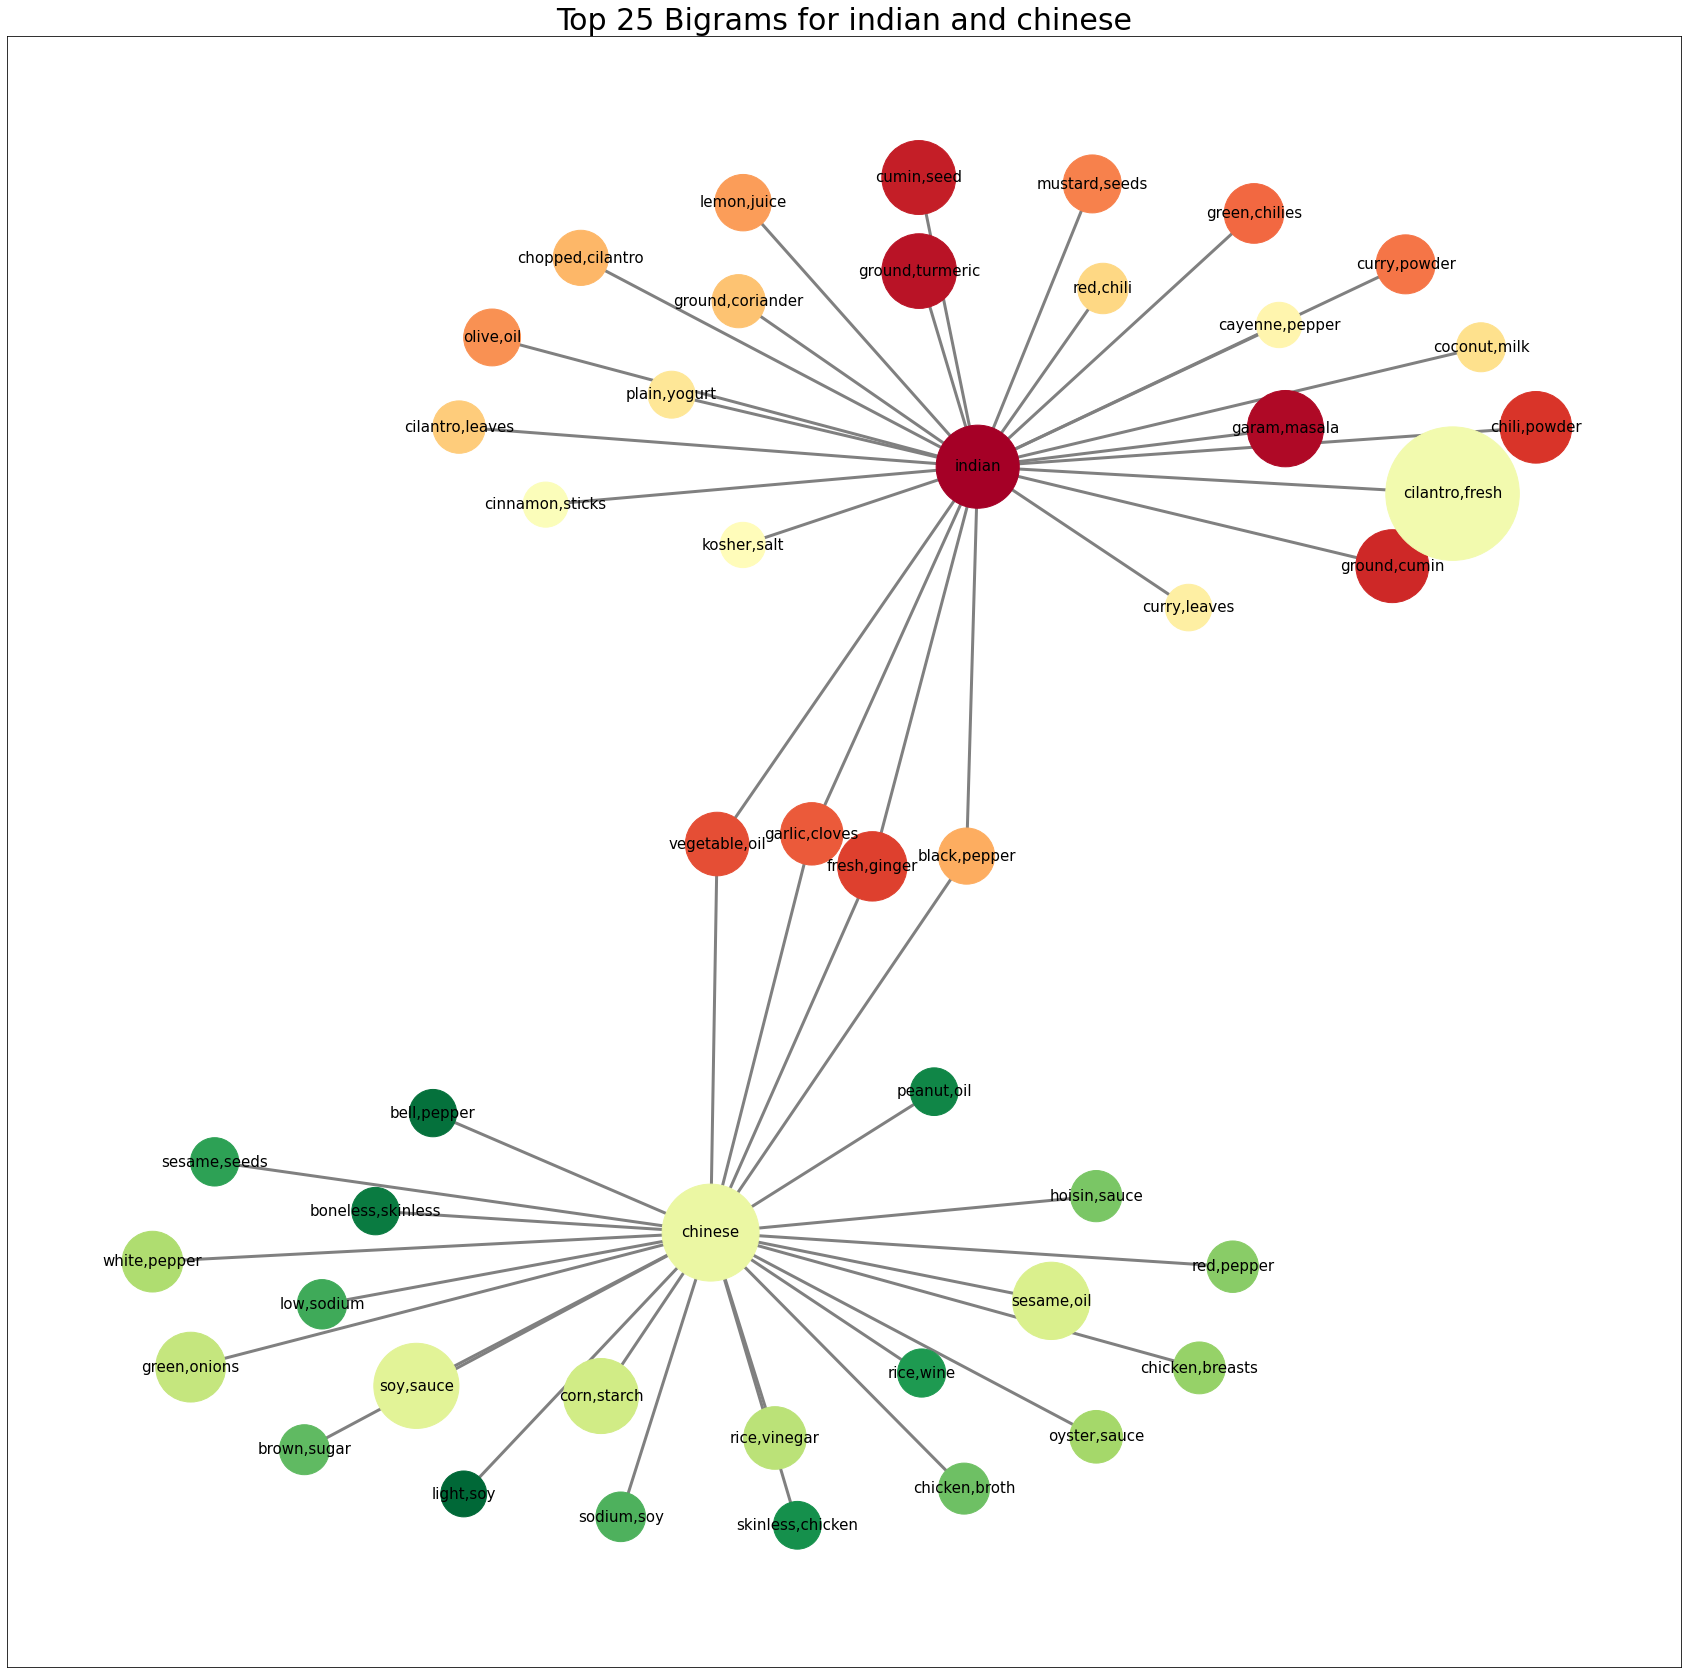

<Figure size 432x288 with 0 Axes>

In [ ]:

df_incredients_train['seperated_ingredients'] = df_incredients_train['ingredients'].apply(','.join)
df_incredients_train['for ngrams']=df_incredients_train['seperated_ingredients'].str.replace(',',' ')
def generate_ngrams(text, n):
    words = text.split(' ')
    iterations = len(words) - n + 1
    for i in range(iterations):
        yield words[i:i + n]
def net_diagram(*cuisines):
    ngrams = {}
    for title in df_incredients_train[df_incredients_train.cuisine==cuisines[0]]['for ngrams']:
            for ngram in generate_ngrams(title, 2):
                ngram = ','.join(ngram)
                if ngram in ngrams:
                    ngrams[ngram] += 1
                else:
                    ngrams[ngram] = 1

    ngrams_mws_df = pd.DataFrame.from_dict(ngrams, orient='index')
    ngrams_mws_df.columns = ['count']
    ngrams_mws_df['cusine'] = cuisines[0]
    ngrams_mws_df.reset_index(level=0, inplace=True)

    ngrams = {}
    for title in df_incredients_train[df_incredients_train.cuisine==cuisines[1]]['for ngrams']:
            for ngram in generate_ngrams(title, 2):
                ngram = ','.join(ngram)
                if ngram in ngrams:
                    ngrams[ngram] += 1
                else:
                    ngrams[ngram] = 1

    ngrams_mws_df1 = pd.DataFrame.from_dict(ngrams, orient='index')
    ngrams_mws_df1.columns = ['count']
    ngrams_mws_df1['cusine'] = cuisines[1]
    ngrams_mws_df1.reset_index(level=0, inplace=True)
    cuisine1=ngrams_mws_df.sort_values('count',ascending=False)[:25]
    cuisine2=ngrams_mws_df1.sort_values('count',ascending=False)[:25]
    df_final=pd.concat([cuisine1,cuisine2])
    g = nx.from_pandas_edgelist(df_final,source='cusine',target='index')
    cmap = plt.cm.RdYlGn
    colors = [n for n in range(len(g.nodes()))]
    k = 0.35
    pos=nx.spring_layout(g, k=k)
    node_size_new = df_final['count'].values*8
    nx.draw_networkx(g, pos, node_size=node_size_new[:len(pos)], cmap = cmap, node_color=colors, edge_color='grey', font_size=15, width=3)
    plt.title("Top 25 Bigrams for %s and %s" %(cuisines[0],cuisines[1]), fontsize=30)
    plt.gcf().set_size_inches(30,30)
    plt.show()
    plt.savefig('network.png')
    
net_diagram('indian','chinese')

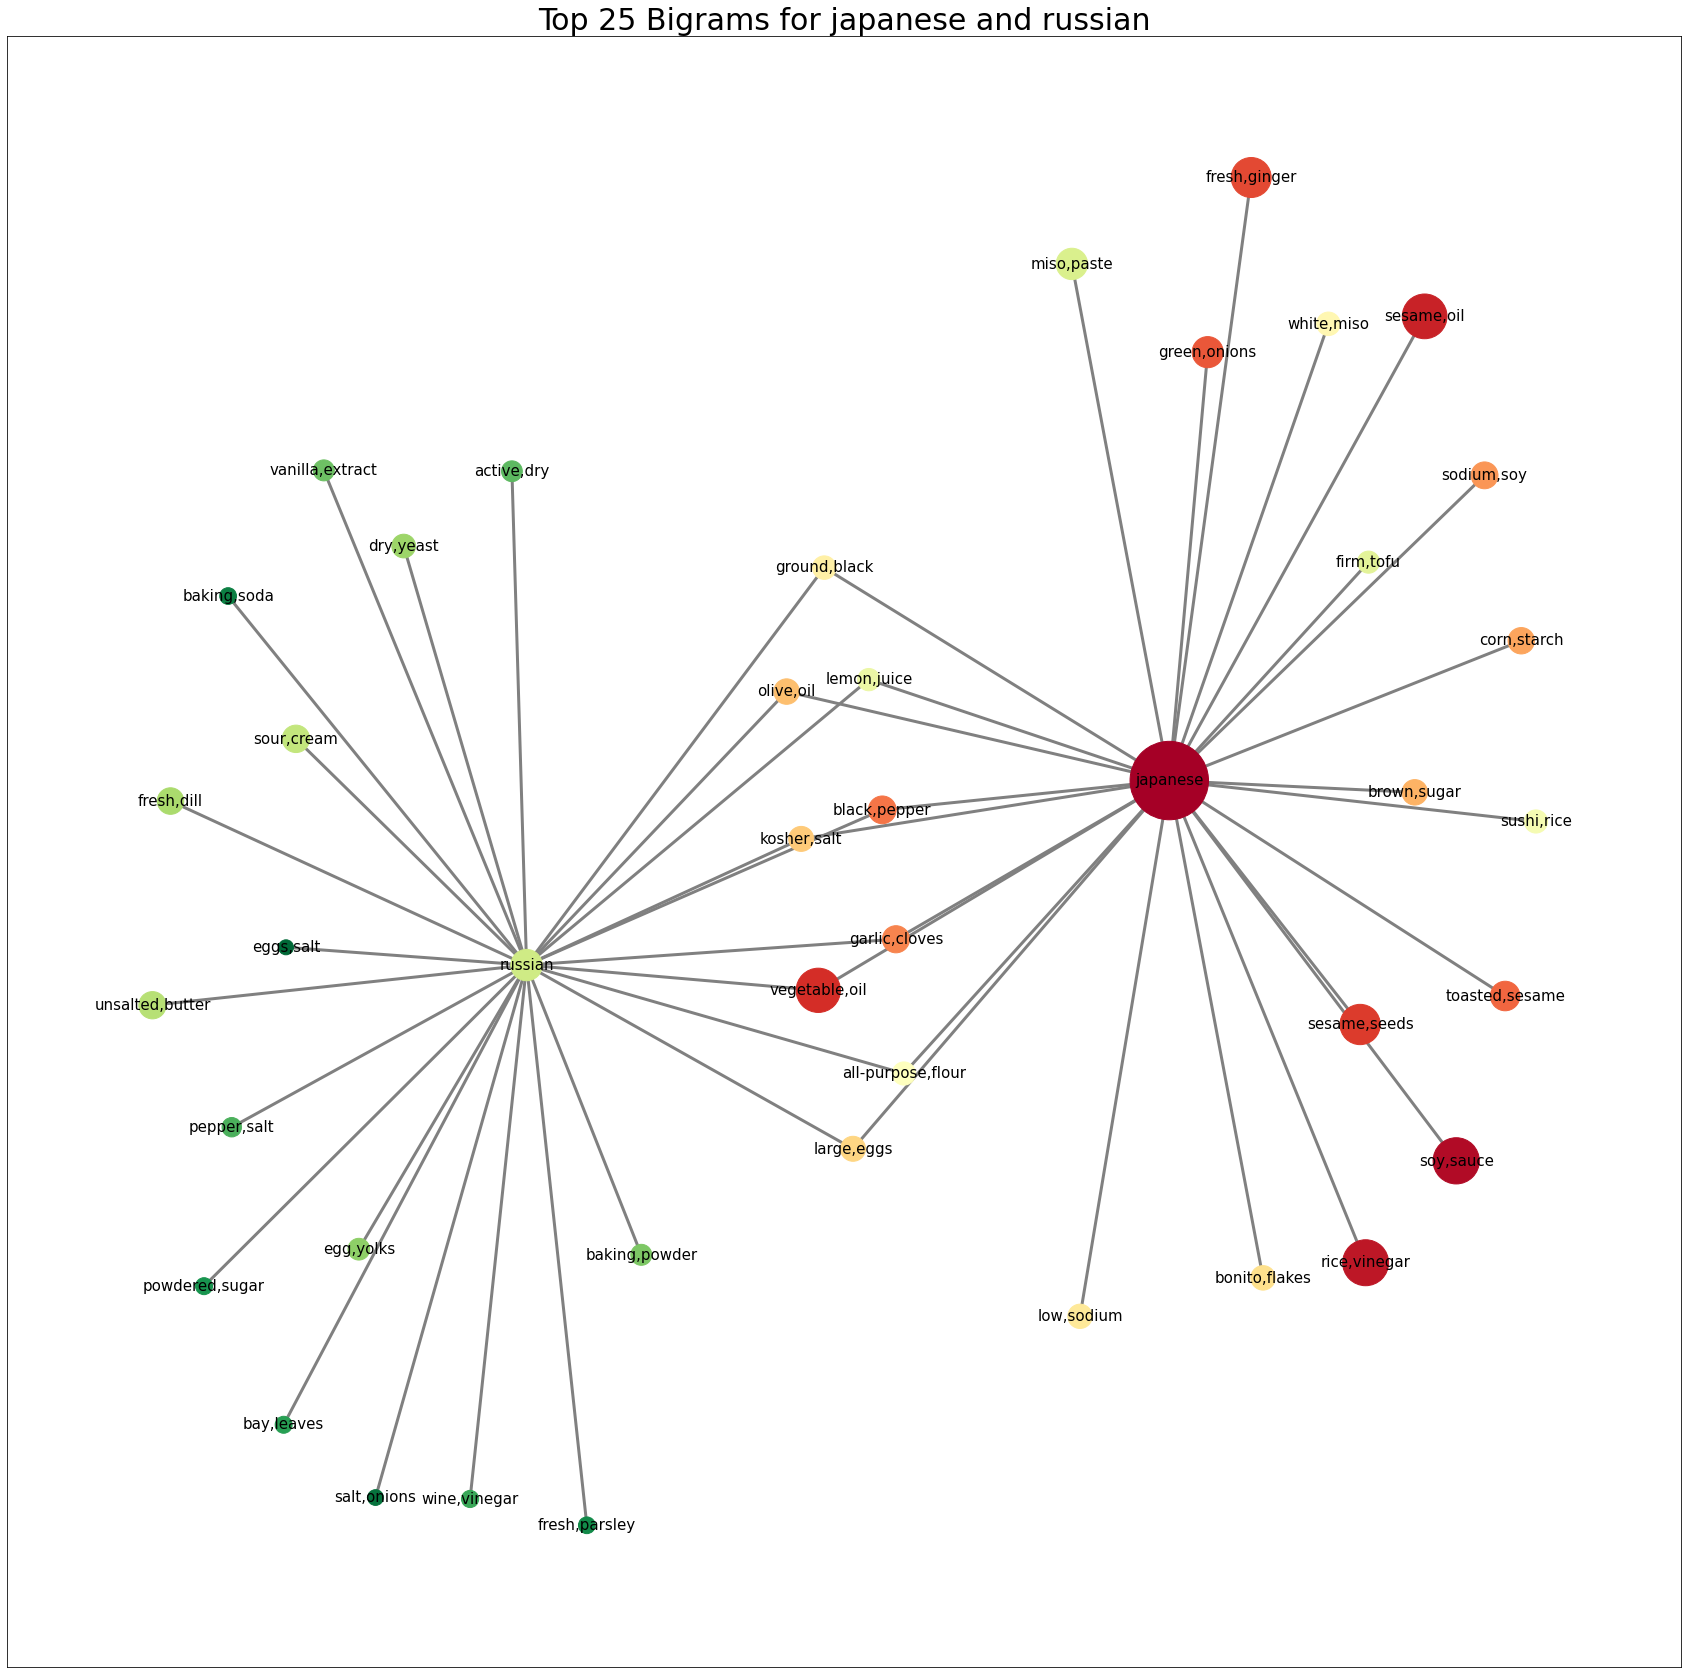

<Figure size 432x288 with 0 Axes>

In [ ]:
net_diagram('japanese','russian')

In [ ]:
!pip install spacy

In [ ]:
from spacy.lang.en import English
nlp = English()
sbd = nlp.create_pipe('sentencizer')
nlp.add_pipe(sbd)


In [ ]:
corpus_fig = st.CorpusFromPandas(dataset_cuisine_ingredients, 
...                              category_col='cuisine', 
...                              text_col='ingredients_query',
...                              nlp=nlp).build()

In [ ]:
html = st.produce_scattertext_explorer(corpus_fig,
             category='indian',
             category_name='Indian',
             not_category_name='Other',
             width_in_pixels=1000,
             use_non_text_features=False)

In [ ]:

import os
file_name = 'Cuisine.html'
with open(file_name, 'w',encoding='utf8') as outf:
    outf.write(html)
rel_report_path = os.path.relpath(file_name)
from IPython.display import IFrame    
display(IFrame(file_name, width=900, height=650))

In [ ]:
dataset_cuisine_ingredients['ingredients']

0        romaine lettuce black olives grape tomatoes ga...
1        plain flour ground pepper salt tomatoes ground...
2        eggs pepper salt mayonaise cooking oil green c...
3                           water vegetable oil wheat salt
4        black pepper shallots cornflour cayenne pepper...
                               ...                        
39769    light brown sugar granulated sugar butter warm...
39770    KRAFT Zesty Italian Dressing purple onion broc...
39771    eggs citrus fruit raisins sourdough starter fl...
39772    boneless chicken skinless thigh minced garlic ...
39773    green chile jalapeno chilies onions ground bla...
Name: ingredients, Length: 39774, dtype: object

In [ ]:
dataset_cuisine_ingredients['ingredients'] = dataset_cuisine_ingredients['ingredients'].str.replace('\d+', '')

## Unigram

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [ ]:
! pip install cufflinks --upgrade

In [ ]:
common_words = get_top_n_words(dataset_cuisine_ingredients['ingredients'], 20)
for word, freq in common_words:
    print(word, freq)
df_unigram = pd.DataFrame(common_words, columns = ['ingredients' , 'count'])

pepper 25742
salt 24462
oil 23344
garlic 18941
ground 18271
fresh 17853
sauce 13129
sugar 12493
onions 12341
cheese 11776
chicken 11471
olive 10920
black 10753
water 9790
red 9189
flour 8851
butter 8648
tomatoes 8599
green 8531
powder 8290


In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
configure_plotly_browser_state()
df_unigram.groupby('ingredients').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in ingredients (Unigram)')

## Bigrams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bigram_word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
bigram_sparse_matrix = bigram_word_vectorizer.fit_transform(dataset_cuisine_ingredients['ingredients'])
bigram_frequencies = sum(bigram_sparse_matrix).toarray()[0]
bigram_words = bigram_word_vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
len(bigram_frequencies)

78006

In [ ]:
len(bigram_words)

78006

In [ ]:
bigram_df = pd.DataFrame({'Words':bigram_words,'Frequency':bigram_frequencies})
bigram_fig = bigram_df.sort_values(by='Frequency',ascending=False).head(25)
bigram_fig

,Words,Frequency
43004,olive oil,10916
4673,black pepper,8040
26655,garlic cloves,7110
29000,ground black,5004
203,all purpose,4831
64272,soy sauce,4822
72916,vegetable oil,4731
53522,purpose flour,4640
4327,bell pepper,4246
28689,green onions,3550


In [ ]:
fig = px.bar(bigram_fig, x= 'Words', y='Frequency', title='Counts of top bigrams', labels={'Words': 'Bigram', 'Frequency': 'Count'})
fig.show()

## Trigrams

In [ ]:
trigram_word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
trigram_sparse_matrix = trigram_word_vectorizer.fit_transform(dataset_cuisine_ingredients['ingredients'])
trigram_frequencies = sum(trigram_sparse_matrix).toarray()[0]
trigram_words = trigram_word_vectorizer.get_feature_names()
trigram_df = pd.DataFrame({'Words':trigram_words,'Frequency':trigram_frequencies})
trigram_fig = trigram_df.sort_values(by='Frequency',ascending=False).head(25)
trigram_fig

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,Words,Frequency
96626,ground black pepper,5004
450,all purpose flour,4640
234624,virgin olive oil,2758
72985,extra virgin olive,2753
175499,red bell pepper,1946
93852,grated parmesan cheese,1896
15347,boneless skinless chicken,1796
43190,chopped cilantro fresh,1717
82679,fresh lemon juice,1679
94382,green bell pepper,1497


In [ ]:
fig = px.bar(trigram_fig, x= 'Words', y='Frequency', title='Counts of top Trigrams', labels={'Words': 'Trigram', 'Frequency': 'Count'})
fig.show()

In [ ]:
## Most used ingredients in each cuisines
dataset_cuisine_ingredients

,cuisine,ingredients,ingredients_query
0,greek,romaine lettuce black olives grape tomatoes ga...,romaine lettuce black olive grape tomato garli...
1,southern_us,plain flour ground pepper salt tomatoes ground...,plain flour ground tomato ground black thyme e...
2,filipino,eggs pepper salt mayonaise cooking oil green c...,egg mayonaise cooking oil green chilies grille...
3,indian,water vegetable oil wheat salt,water vegetable oil wheat
4,indian,black pepper shallots cornflour cayenne pepper...,black shallot cornflour cayenne onion garlic p...
...,...,...,...
39769,irish,light brown sugar granulated sugar butter warm...,light brown sugar granulated sugar butter warm...
39770,italian,KRAFT Zesty Italian Dressing purple onion broc...,kraft zesty italian dressing purple onion broc...
39771,irish,eggs citrus fruit raisins sourdough starter fl...,egg citrus fruit raisin sourdough starter flou...
39772,chinese,boneless chicken skinless thigh minced garlic ...,boneless chicken skinless thigh minced garlic ...


##Top 20 parts of speech tagging of ingredients query

In [ ]:
#!pip install spacytextblob

In [ ]:
!pip install TextBlob

In [ ]:
from textblob import TextBlob

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
configure_plotly_browser_state()
blob = TextBlob(str(dataset_cuisine_ingredients['ingredients']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top  Part-of-speech tagging for ingredients corpus')

### Feature Selection with Chi-square Method

In [ ]:
corpus

0        romaine lettuce black olive grape tomato garli...
1        plain flour ground tomato ground black thyme e...
2        egg mayonaise cooking oil green chilies grille...
3                                water vegetable oil wheat
4        black shallot cornflour cayenne onion garlic p...
                               ...                        
39769    light brown sugar granulated sugar butter warm...
39770    kraft zesty italian dressing purple onion broc...
39771    egg citrus fruit raisin sourdough starter flou...
39772    boneless chicken skinless thigh minced garlic ...
39773    green chile jalapeno chilies onion ground blac...
Name: ingredients_query, Length: 39774, dtype: object

In [ ]:
## Chi squarred correlation embeddings reduction
labels = dataset_cuisine_ingredients["cuisine"]
labels

0              greek
1        southern_us
2           filipino
3             indian
4             indian
            ...     
39769          irish
39770        italian
39771          irish
39772        chinese
39773        mexican
Name: cuisine, Length: 39774, dtype: object

In [ ]:
names = vectorizer.get_feature_names()
names[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['achiote', 'achiote paste', 'acorn', 'acorn squash', 'active']

In [ ]:
    p_value_limit = 0.95
    dtf_features = pd.DataFrame()

In [ ]:
for cat in np.unique(labels):
        chi2, p = feature_selection.chi2(embedded_ingredients, labels==cat)
        dtf_features = dtf_features.append(pd.DataFrame(
                       {"feature":names, "score":1-p, "labels":cat}))
        dtf_features = dtf_features.sort_values(["labels","score"], 
                        ascending=[True,False])
        dtf_features = dtf_features[dtf_features["score"]>p_value_limit]

In [ ]:
dtf_features.head()

,feature,score,labels
54,almond milk,1.0,brazilian
170,açai,1.0,brazilian
1069,butter chocolate,1.0,brazilian
1242,cachaca,1.0,brazilian
1243,cachaca lime,1.0,brazilian


In [ ]:
dtf_features["labels"].unique()

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

In [ ]:
x = dtf_features["labels"].unique()
x

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

In [ ]:
dict_label = {}
for cat in x:
  dict_label[cat] = dtf_features[dtf_features["labels"]==cat]["feature"].values[:10]


In [ ]:
dict_label

{'brazilian': array(['almond milk', 'açai', 'butter chocolate', 'cachaca',
        'cachaca lime', 'chocolate sprinkle', 'coconut', 'condensed',
        'condensed milk', 'crushed ice'], dtype=object),
 'british': array(['beef dripping', 'currant', 'double', 'double cream', 'dripping',
        'flour beef', 'golden syrup', 'haddock', 'haddock fillet', 'jam'],
       dtype=object),
 'cajun_creole': array(['andouille', 'andouille sausage', 'bay', 'bay leaf', 'bell',
        'bell bay', 'bell cajun', 'bell creole', 'broth cajun',
        'butter creole'], dtype=object),
 'chinese': array(['bamboo', 'bamboo shoot', 'bean paste', 'bean sauce',
        'black vinegar', 'bok', 'bok choy', 'broccoli', 'broccoli floret',
        'chestnut'], dtype=object),
 'filipino': array(['annatto', 'belly', 'belly garlic', 'calamansi', 'calamansi juice',
        'coconut', 'cooking oil', 'glutinous', 'glutinous rice',
        'jackfruit'], dtype=object),
 'french': array(['butter', 'calvados', 'chocolate',

In [ ]:
 names = dtf_features["feature"].unique().tolist()

In [ ]:
names[0:5]

['almond milk', 'açai', 'butter chocolate', 'cachaca', 'cachaca lime']

In [ ]:
    ## Check the main ingredients
    for cat in np.unique(labels):
        print("# {}:".format(cat))
        print("  . selected features:",len(dtf_features[dtf_features["labels"]==cat]))
        print("  . top features:", ",".join(dtf_features[dtf_features["labels"]==cat]["feature"].values[:10]))
    

# brazilian:
  . selected features: 242
  . top features: almond milk,açai,butter chocolate,cachaca,cachaca lime,chocolate sprinkle,coconut,condensed,condensed milk,crushed ice
# british:
  . selected features: 510
  . top features: beef dripping,currant,double,double cream,dripping,flour beef,golden syrup,haddock,haddock fillet,jam
# cajun_creole:
  . selected features: 767
  . top features: andouille,andouille sausage,bay,bay leaf,bell,bell bay,bell cajun,bell creole,broth cajun,butter creole
# chinese:
  . selected features: 1286
  . top features: bamboo,bamboo shoot,bean paste,bean sauce,black vinegar,bok,bok choy,broccoli,broccoli floret,chestnut
# filipino:
  . selected features: 437
  . top features: annatto,belly,belly garlic,calamansi,calamansi juice,coconut,cooking oil,glutinous,glutinous rice,jackfruit
# french:
  . selected features: 952
  . top features: butter,calvados,chocolate,cognac,crème,crème fraîche,de provence,dijon,dijon mustard,duck
# greek:
  . selected features

In [ ]:
!pip install spacy python -m spacy download en


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -m


##Creating HTML of Feature selected for Indian cuisine

In [ ]:
from spacy.lang.en import English
nlp = English()
sbd = nlp.create_pipe('sentencizer')
nlp.add_pipe(sbd)
corpus_fig = st.CorpusFromPandas(dtf_features,
                             category_col='labels',
                             text_col='feature',
                             nlp=nlp).build()

In [ ]:
html_indian = st.produce_scattertext_explorer(corpus_fig,
             category='indian', 
             category_name='indian',
             not_category_name='Other',
             width_in_pixels=1000,
             use_non_text_features=False)

In [ ]:
import os
file_name = 'selected_indian.html'
with open(file_name, 'w',encoding='utf8') as outf:
    outf.write(html_indian)
rel_report_path = os.path.relpath(file_name)
from IPython.display import IFrame    
display(IFrame(file_name, width=900, height=650))

##Creating HTML of feature selected for chinese cuisine

In [ ]:
html_chinese = st.produce_scattertext_explorer(corpus_fig,
             category='chinese', 
             category_name='Chinese',
             not_category_name='Other',
             width_in_pixels=1000,
             use_non_text_features=False)


file_name = 'selected_chinese.html'
with open(file_name, 'w',encoding='utf8') as outf:
    outf.write(html_chinese)
rel_report_path = os.path.relpath(file_name)
from IPython.display import IFrame    
display(IFrame(file_name, width=900, height=650))


In [ ]:
    ## New embeddings
    vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=names)
    vectorizer.fit(corpus)
    embedded_ingredients = vectorizer.transform(corpus)
    dic_vocabulary = vectorizer.vocabulary_


##Creating HTML of feature selected for British Cuisine

In [ ]:
html_british = st.produce_scattertext_explorer(corpus_fig,
             category='british', 
             category_name='British',
             not_category_name='other',
             width_in_pixels=1000,
             use_non_text_features=False)


file_name = 'selected_british.html'
with open(file_name, 'w',encoding='utf8') as outf:
    outf.write(html_british)
rel_report_path = os.path.relpath(file_name)
from IPython.display import IFrame    
display(IFrame(file_name, width=900, height=650))

### Clean the ingredinets text of the Recipe Main dataset

In [ ]:
 # list of stopwords
stop_word_list = nltk.corpus.stopwords.words("english")

# Extend list of stop words
stop_word_list.extend(additional_stop_words)

data["ingredients_query"] = data["ingredients"].apply(lambda x: preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=stop_word_list))

In [ ]:
data.head()

,title,ingredients,instructions,ingredients_query
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",skinless boneless chicken breast half butter ...
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",can condensed cream mushroom soup package dry...
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,cup packed brown sugar cup ketchup lean groun...
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,cup butter softened cup white sugar cup packe...
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,whole wheat rotini pasta fresh broccoli flore...


##Modeling

### In modelling part we are trying to predict the cuisines from ingredients. 

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn import utils
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pickle
import os

In [ ]:
MODEL_PATH = "models/nlp"
MODEL_EMBEDDINGS_PATH = os.path.join(MODEL_PATH, 'similarity_embeddings')
CUISINE_CLASSES = ['brazilian','british','cajun_creole','chinese','filipino','french','greek','indian','irish','italian','jamaican','japanese','korean','mexican','moroccan','russian','southern_us','spanish','thai','vietnamese']
os.makedirs(MODEL_PATH, exist_ok=True)
os.makedirs(MODEL_EMBEDDINGS_PATH, exist_ok=True)

In [ ]:
df_cuisine_ingredients = dataset_cuisine_ingredients

In [ ]:
df_cuisine_ingredients.head()

,cuisine,ingredients,ingredients_query
0,greek,romaine lettuce black olives grape tomatoes ga...,romaine lettuce black olive grape tomato garli...
1,southern_us,plain flour ground pepper salt tomatoes ground...,plain flour ground tomato ground black thyme e...
2,filipino,eggs pepper salt mayonaise cooking oil green c...,egg mayonaise cooking oil green chilies grille...
3,indian,water vegetable oil wheat salt,water vegetable oil wheat
4,indian,black pepper shallots cornflour cayenne pepper...,black shallot cornflour cayenne onion garlic p...


In [ ]:
vectorizer = feature_extraction.text.TfidfVectorizer()

In [ ]:
## Model
classifier = LogisticRegressionCV(cv=3,random_state=42,
                                      max_iter=300,
                                      n_jobs=-1,
                                      verbose=1) #naive_bayes.MultinomialNB()




In [ ]:
## pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                                ("classifier", classifier)])

In [ ]:
## Split the dataset
df_cuisine_ingredients_train, df_cuisine_ingredients_test = model_selection.train_test_split(df_cuisine_ingredients, test_size=0.3, random_state=42)

In [ ]:
 X_train = df_cuisine_ingredients_train['ingredients_query']; 
 X_test = df_cuisine_ingredients_test['ingredients_query'];

In [ ]:
y_train = df_cuisine_ingredients_train['cuisine']; 
y_test = df_cuisine_ingredients_test['cuisine']; 

In [ ]:
  ## train classifier
  model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.3min finished


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 LogisticRegressionCV(cv=3, max_iter=300, n_jobs=-1,
                                      random_state=42, verbose=1))])

In [ ]:
predicted = model.predict(X_test)

In [ ]:
predicted

array(['chinese', 'spanish', 'greek', ..., 'indian', 'french', 'mexican'],
      dtype=object)

In [ ]:
predicted_prob = model.predict_proba(X_test)
predicted_prob

array([[6.30620428e-05, 1.27005272e-04, 2.18292261e-04, ...,
        9.37993983e-05, 7.29817813e-04, 6.09101707e-03],
       [1.05972193e-03, 1.92034972e-03, 3.17051553e-03, ...,
        8.04669476e-01, 3.01986105e-04, 9.21427683e-04],
       [2.11311261e-03, 1.65459231e-04, 1.68084195e-03, ...,
        1.25435314e-02, 3.55839424e-05, 7.83748465e-05],
       ...,
       [3.64937666e-05, 1.30768240e-05, 5.10291680e-05, ...,
        2.29560263e-05, 1.36590374e-04, 8.90600035e-04],
       [1.53866858e-02, 6.40917162e-02, 3.44317007e-02, ...,
        4.95750414e-02, 5.79542466e-03, 1.31975179e-03],
       [2.28400598e-02, 7.67801416e-04, 1.18746111e-02, ...,
        1.52378867e-02, 1.95027975e-04, 2.44837636e-04]])

In [ ]:
classes = np.unique(y_test)
classes

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

##Evaluation Metric

In [ ]:
accuracy = metrics.accuracy_score(y_test, predicted)
accuracy

0.7885695131148914

##Confusion matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
 cm = metrics.confusion_matrix(y_test, predicted)
 

##Confusion Metrics

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text major ticklabel objects>)

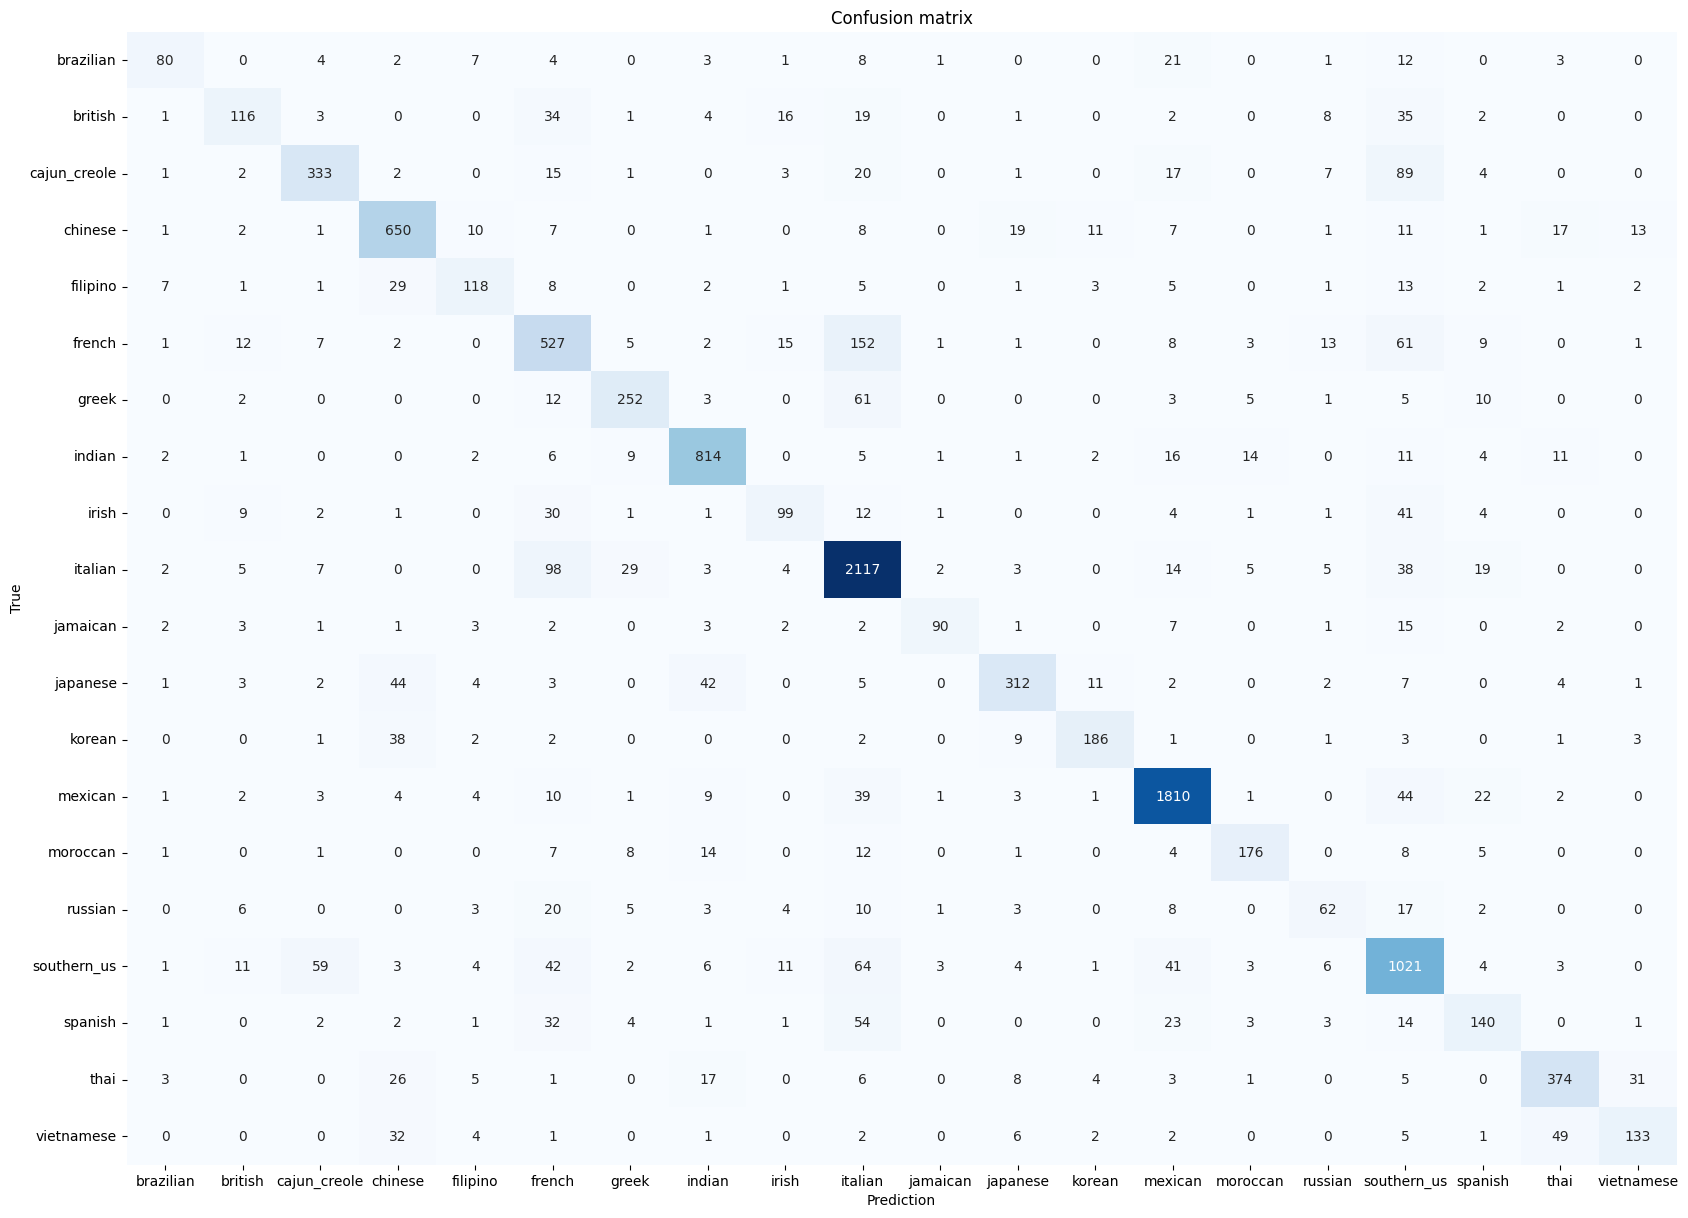

In [ ]:
fig, ax = plt.subplots(figsize=(20,15), dpi=100)
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
ax.set(xlabel="Prediction", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

##Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))



              precision    recall  f1-score   support

   brazilian       0.76      0.54      0.63       147
     british       0.66      0.48      0.56       242
cajun_creole       0.78      0.67      0.72       495
     chinese       0.78      0.86      0.81       760
    filipino       0.71      0.59      0.64       200
      french       0.61      0.64      0.63       820
       greek       0.79      0.71      0.75       354
      indian       0.88      0.91      0.89       899
       irish       0.63      0.48      0.54       207
     italian       0.81      0.90      0.85      2351
    jamaican       0.89      0.67      0.76       135
    japanese       0.83      0.70      0.76       443
      korean       0.84      0.75      0.79       249
     mexican       0.91      0.92      0.92      1957
    moroccan       0.83      0.74      0.78       237
     russian       0.55      0.43      0.48       144
 southern_us       0.70      0.79      0.74      1289
     spanish       0.61    

In [ ]:
## Save to file in the current working directory
def save_pkl(file, pkl_filename):
    with open(pkl_filename, 'wb') as pkl_file:
        pickle.dump(file, pkl_file)

In [ ]:
save_pkl(model, os.path.join(MODEL_PATH, "pickle_model.pkl"))


In [ ]:
def load_pkl(pkl_filename):
    with open(pkl_filename, 'rb') as pkl_file:
        return pickle.load(pkl_file)
        

In [ ]:
df_main_recipe = data

In [ ]:
model = load_pkl(os.path.join(MODEL_PATH, 'pickle_model.pkl'))
df_main_recipe["cuisine"] = model.predict(data["ingredients_query"].tolist())

In [ ]:
df_main_recipe[0:5]

,title,ingredients,instructions,ingredients_query,cuisine
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",skinless boneless chicken breast half butter ...,southern_us
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",can condensed cream mushroom soup package dry...,italian
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,cup packed brown sugar cup ketchup lean groun...,southern_us
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,cup butter softened cup white sugar cup packe...,southern_us
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,whole wheat rotini pasta fresh broccoli flore...,italian


##Word Embedding for finding similar recipes from ingredients

###Implimenting Doc2Vec Algorithm

In [ ]:
def d2v_embeddings(data):
  data = data['ingredients_query'].tolist()
  tagged_data = [TaggedDocument(words=row.split(), tags=[str(index)]) for index, row in enumerate(data)]
  model = Doc2Vec(tagged_data, vector_size=50, window=2, min_count=1, workers=4, epochs = 100,min_alpha=0.00025,dm =1)
    
  return model

In [ ]:
  # max_epochs = 100
  # vec_size = 20
  # alpha = 0.025

  # model = Doc2Vec(size=vec_size,
  #               alpha=alpha, 
  #               min_alpha=0.00025,
  #               min_count=1,
  #               dm =1)
  
  # model.build_vocab(tagged_data)

  # for epoch in range(max_epochs):
  #   print('iteration {0}'.format(epoch))
  #   model.train(tagged_data,
  #               total_examples=model.corpus_count,
  #               epochs=model.iter)
  #   # decrease the learning rate
  #   model.alpha -= 0.0002
  #   # fix the learning rate, no decay
  #   model.min_alpha = model.alpha

In [ ]:
data = df_main_recipe
data

,title,ingredients,instructions,ingredients_query,cuisine
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",skinless boneless chicken breast half butter ...,southern_us
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",can condensed cream mushroom soup package dry...,italian
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,cup packed brown sugar cup ketchup lean groun...,southern_us
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,cup butter softened cup white sugar cup packe...,southern_us
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,whole wheat rotini pasta fresh broccoli flore...,italian
...,...,...,...,...,...
124642,Summer Corn Salad,"[4 ears fresh corn, 2 heads Belgian endive, 2 ...",Watch how to make this recipe.\nPreheat a gril...,ear fresh corn head belgian endive olive oil ...,mexican
124643,Zucchini Stuffed Tomatoes,"[4 large plum tomatoes, Salt and sugar, 1 1/2 ...",Preheat the broiler. Cut the tomatoes in 1/2 c...,large plum tomato sugar zucchini shallot slic...,french
124644,Pepper Pasta Quick Cook,"[3 tablespoons olive oil, 2 tablespoons unsalt...",Heat the oil and butter in a large skillet ove...,olive oil unsalted butter medium clove garlic...,italian
124645,Chocolate Cake with Armagnac Ice Cream,"[8 ounces butter, 8 ounces bittersweet chocola...",Preheat oven to 350 degrees. On the top half o...,butter bittersweet chocolate whole egg egg yo...,italian


In [ ]:
 for cuisine in CUISINE_CLASSES:
        data_cuisine = data[data['cuisine'] == cuisine]
        print(data_cuisine.iloc[:,0:4])
        model_embedding = d2v_embeddings(data_cuisine.iloc[:,0:4])
        save_pkl(model_embedding, os.path.join(MODEL_EMBEDDINGS_PATH, f'd2v_{cuisine}.pkl')) 


                                         title  ...                                  ingredients_query
454                                      Fudge  ...   semisweet chocolate chip sweetened condensed ...
971                          Easy Granola Bars  ...   quickcooking oat sweetened condensed milk but...
2621                   Cookies 'n' Creme Fudge  ...   package white chocolate baking square eagle b...
2772                                Brigadeiro  ...   unsweetened cocoa butter sweetened condensed ...
4426    Brazilian Cheese Bread (Pao de Queijo)  ...   cup olive oil butter cup water cup milk soy m...
...                                        ...  ...                                                ...
123423                   Mango Lime Caipirinha  ...   lime cup sugar ounce bottle mango nectar ice ...
123578                       Coconut Macaroons  ...   sweetened shredded coconut sweetened condense...
123870                      Paradise Macaroons  ...   ounce package sweet



```
# This is formatted as code
```

#Prediction of Cuisines from Ingredients

In [ ]:
def get_tokenize_text(input_text):
    # list of stopwords
    stop_word_list = nltk.corpus.stopwords.words("english")

    # Extend list of stop words
    stop_word_list.extend(additional_stop_words)

    return preprocess_text(input_text, flg_stemm=False, flg_lemm=True, lst_stopwords=stop_word_list)

### The model is trained with logistic regression.

In [ ]:
 #The function to predict the cuisine
 def predict_cuisine(input_text):
    top = 3
    
    # Tokenize text
    tokenize_text = get_tokenize_text(input_text)
    
    # Get model
    model_path = os.path.join(MODEL_PATH, 'pickle_model.pkl')
    model = load_pkl(model_path)
    
    # Tokenize text
    tokenize_text = get_tokenize_text(input_text)

    # Get classes ordered by probability
    proba = model.predict_proba([tokenize_text])[0]

    # Sorted index list 
    indexes = sorted(range(len(proba)), key=lambda k: proba[k], reverse=True)

    # Get cuisine
    cuisine_labels = model.classes_.tolist()
    cusine_ordered = [cuisine_labels[ind] for ind in indexes]

    return cusine_ordered[:top]

In [ ]:
ingredients_list = ['rice','bread','egg','onion']

In [ ]:
ingredients_list2 = ['coffee','sugar']

In [ ]:
 text_u = ' '.join(ingredients_list)

In [ ]:
text2 =  ' '.join(ingredients_list2)

In [ ]:
cusines = predict_cuisine(text_u)

In [ ]:
cusines #The predicted cuisine

['spanish', 'korean', 'japanese']

##Recommending similiar recipes based on cuisine and ingredients

In [ ]:
 # Tokenize text
tokenize_text = get_tokenize_text(text_u).split()
    
cuisine = 'indian'
  # Load model from the selected cuisine
d2v = load_pkl(os.path.join(MODEL_EMBEDDINGS_PATH, f'd2v_{cuisine}.pkl'))


In [ ]:
# Get embeddings
embeddings = d2v.infer_vector(tokenize_text)
best_recipes = d2v.docvecs.most_similar([embeddings]) #gives you top 10 document tags and their cosine similarity

# Get recipes
best_recipes_index = [int(output[0]) for output in best_recipes]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).



In [ ]:
# Get recipes
best_recipes_index = [int(output[0]) for output in best_recipes]

In [ ]:
best_recipes_index

[192, 346, 1150, 3409, 99, 256, 1032, 2848, 620, 963]

In [ ]:
data_recipes = data.iloc[:,0:4]
recipes_data = data_recipes[data_recipes.index.isin(best_recipes_index)].head(5)

In [ ]:
recipes_data

,title,ingredients,instructions,ingredients_query
99,Double Layer Pumpkin Cheesecake,"[2 (8 ounce) packages cream cheese, softened A...",Preheat oven to 325 degrees F (165 degrees C)....,package cream cheese softened cup white sugar...
192,Lime Chicken Soft Tacos,"[1 1/2 pounds skinless, boneless chicken breas...",Saute chicken in a medium saucepan over medium...,skinless boneless chicken breast meat cubed c...
256,Red Skinned Potato Salad,"[2 pounds clean, scrubbed new red potatoes ADV...",Bring a large pot of salted water to a boil. A...,clean scrubbed new red potato egg bacon onion...
346,Hungarian Mushroom Soup,"[4 tablespoons unsalted butter ADVERTISEMENT, ...",Melt the butter in a large pot over medium hea...,unsalted butter chopped onion fresh mushroom ...
620,French Bread,"[6 cups all-purpose flour ADVERTISEMENT, 2 1/2...","In a large bowl, combine 2 cups flour, yeast a...",allpurpose flour package active dry yeast war...


In [ ]:
recipes_data['ingredients']

99     [2 (8 ounce) packages cream cheese, softened A...
192    [1 1/2 pounds skinless, boneless chicken breas...
256    [2 pounds clean, scrubbed new red potatoes ADV...
346    [4 tablespoons unsalted butter ADVERTISEMENT, ...
620    [6 cups all-purpose flour ADVERTISEMENT, 2 1/2...
Name: ingredients, dtype: object

In [ ]:
sep = '\n\n'
for index, row in recipes_data.iterrows():
  title = 'Title: ' + row['title'] 
  ingredients=''
  list_ing = str(row['ingredients']).replace('ADVERTISEMENT', '').strip('][').split(', ')
  for ingredient in list_ing:
      ingredients += ingredient.replace("'", "") + '\n'
  ingredients = 'Ingredients: ' + '\n' + ingredients
  instructions = 'Instruction: '+ '\n' + row['instructions']

  txt = title + sep + ingredients + sep + instructions
  print(txt)



Title: Double Layer Pumpkin Cheesecake

Ingredients: 
2 (8 ounce) packages cream cheese
softened 
1/2 cup white sugar 
1/2 teaspoon vanilla extract 
2 eggs 
1 (9 inch) prepared graham cracker crust 
1/2 cup pumpkin puree 
1/2 teaspoon ground cinnamon 
1 pinch ground cloves 
1 pinch ground nutmeg 
1/2 cup frozen whipped topping
thawed 



Instruction: 
Preheat oven to 325 degrees F (165 degrees C).
In a large bowl, combine cream cheese, sugar and vanilla. Beat until smooth. Blend in eggs one at a time. Remove 1 cup of batter and spread into bottom of crust; set aside.
Add pumpkin, cinnamon, cloves and nutmeg to the remaining batter and stir gently until well blended. Carefully spread over the batter in the crust.
Bake in preheated oven for 35 to 40 minutes, or until center is almost set. Allow to cool, then refrigerate for 3 hours or overnight. Cover with whipped topping before serving.

Title: Lime Chicken Soft Tacos

Ingredients: 
1 1/2 pounds skinless
boneless chicken breast meat - c